# ⌛ Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# About Dataset:-




ad_ref: a unique ad referance
city: advertisement city (location where vehicle is sold)
assembly: imported or not (local)
body: body type of vehicle
make: manufacturer of vehicle
model: model variant of vehicle
year: year of production
engine_cc: engine volume of vehicle
transmission: Auto/Manual
fuel_type: petrol, diesel of hybrid
color: color of vehicle
registered: registration number city/province of vehicle
mileage: mileage in kms
price: price of vehicle in PKR

# 📥Reading DataSet

In [2]:
df=pd.read_csv('D:\pakwheels_used_car_data_v02.csv')
df.head(10)

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0
5,7943736,Vehari,Imported,Sedan,Honda,Civic,2010.0,1300.0,Automatic,Petrol,Albastar Silver,Punjab,157000,2850000.0
6,7764683,Islamabad,NaN,Hatchback,Suzuki,Swift,2019.0,1300.0,Manual,Petrol,Grey,Islamabad,45000,2675000.0
7,7943739,Faisalabad,NaN,Sedan,Honda,City,2018.0,1300.0,Automatic,Petrol,Maroon,Lahore,187000,3450000.0
8,7894559,Lahore,Imported,Hatchback,Daihatsu,Move,2019.0,660.0,Automatic,Petrol,Fire Quartz Red,Un-Registered,22517,3850000.0
9,7943724,Lahore,NaN,Sedan,Honda,City,2014.0,1300.0,Manual,Petrol,Crystal Black Pearl,Lahore,110000,2585000.0


From the above table we can see that the assembly column have nan values.So, we will impute them in the later section

# 🧠Basic Data Understanding

In [4]:
df.shape

(77878, 14)

After loading the dataset, now examing its shape to get better sense of the data and the information it contains.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        77878 non-null  int64  
 1   city          77878 non-null  object 
 2   assembly      24189 non-null  object 
 3   body          68974 non-null  object 
 4   make          77878 non-null  object 
 5   model         77878 non-null  object 
 6   year          73099 non-null  float64
 7   engine        77875 non-null  float64
 8   transmission  77878 non-null  object 
 9   fuel          76972 non-null  object 
 10  color         76398 non-null  object 
 11  registered    77878 non-null  object 
 12  mileage       77878 non-null  int64  
 13  price         77295 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 8.3+ MB


# 🚀Five number summary

In [6]:
round(df.describe())

,addref,year,engine,mileage,price
count,77878.0,73099.0,77875.0,77878.0,77295.0
mean,7809878.0,2013.0,1408.0,91109.0,3883232.0
std,259952.0,8.0,704.0,89275.0,5759480.0
min,274897.0,1990.0,3.0,1.0,110000.0
25%,7805760.0,2007.0,1000.0,34000.0,1450000.0
50%,7865805.0,2015.0,1300.0,80000.0,2700000.0
75%,7910334.0,2019.0,1600.0,123456.0,4500000.0
max,7943741.0,2022.0,15000.0,1000000.0,529000000.0


In [7]:
df.nunique()

addref          77878
city              297
assembly            1
body               21
make               68
model             435
year               33
engine            229
transmission        2
fuel                3
color             396
registered        121
mileage          9345
price            2323
dtype: int64

In [8]:
num = df.isnull().sum()
per = df.isnull().sum()/len(df)*100
missing_values= pd.DataFrame({"num":num, "per":per}).sort_values(by="num", ascending=False)
missing_values

,num,per
assembly,53689,68.939880
body,8904,11.433267
year,4779,6.136521
color,1480,1.900408
fuel,906,1.163358
price,583,0.748607
engine,3,0.003852
addref,0,0.000000
city,0,0.000000
make,0,0.000000


checking duplicate data

In [9]:
df.duplicated().sum()

0

In [10]:
df.duplicated().sum()

0

# 🎯Handel missing values


In [11]:
df.isna().sum()

addref              0
city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
dtype: int64

In [12]:
df['assembly'].fillna('Local', inplace=True)

In [13]:
df['body'].fillna(method='ffill',inplace = True)
df['engine'].fillna(method='ffill',inplace = True)
df['year'].fillna(method='ffill',inplace = True)
df['color'].fillna(method='ffill',inplace = True)
df['fuel'].fillna(method='bfill',inplace = True)
df['price'].fillna(df['price'].mean(),inplace = True)

In [14]:
df.isna().sum()

addref          0
city            0
assembly        0
body            0
make            0
model           0
year            0
engine          0
transmission    0
fuel            0
color           0
registered      0
mileage         0
price           0
dtype: int64

In [15]:
df.shape

(77878, 14)

# Changing Data Types

In [16]:
df = df.astype({'year':'int16', 'engine':'int16', 'price':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   addref        77878 non-null  int64 
 1   city          77878 non-null  object
 2   assembly      77878 non-null  object
 3   body          77878 non-null  object
 4   make          77878 non-null  object
 5   model         77878 non-null  object
 6   year          77878 non-null  int16 
 7   engine        77878 non-null  int16 
 8   transmission  77878 non-null  object
 9   fuel          77878 non-null  object
 10  color         77878 non-null  object
 11  registered    77878 non-null  object
 12  mileage       77878 non-null  int64 
 13  price         77878 non-null  int64 
dtypes: int16(2), int64(3), object(9)
memory usage: 7.4+ MB


In [19]:
df.head(10)

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price,year_range
0,7943732,Peshawar,Local,Sedan,Toyota,Corolla,2013,1300,Manual,Petrol,Silver Metallic,Lahore,145000,2870000,2010-2014
1,7730314,Lahore,Local,Sedan,Honda,City,2000,1300,Manual,Petrol,Blue,Lahore,230000,995000,2000-2004
2,7943737,Lahore,Local,Sedan,Toyota,Yaris,2021,1300,Manual,Petrol,Super White,Punjab,60500,3585000,2020-2024
3,7943733,Lahore,Local,Hatchback,Suzuki,Swift,2017,1300,Manual,Petrol,Grey,Islamabad,87000,2250000,2015-2019
4,7923484,Lahore,Local,Sedan,Honda,Civic,2017,1800,Automatic,Petrol,Grey,Lahore,86000,4850000,2015-2019
5,7943736,Vehari,Imported,Sedan,Honda,Civic,2010,1300,Automatic,Petrol,Albastar Silver,Punjab,157000,2850000,2010-2014
6,7764683,Islamabad,Local,Hatchback,Suzuki,Swift,2019,1300,Manual,Petrol,Grey,Islamabad,45000,2675000,2015-2019
7,7943739,Faisalabad,Local,Sedan,Honda,City,2018,1300,Automatic,Petrol,Maroon,Lahore,187000,3450000,2015-2019
8,7894559,Lahore,Imported,Hatchback,Daihatsu,Move,2019,660,Automatic,Petrol,Fire Quartz Red,Un-Registered,22517,3850000,2015-2019
9,7943724,Lahore,Local,Sedan,Honda,City,2014,1300,Manual,Petrol,Crystal Black Pearl,Lahore,110000,2585000,2010-2014


#  the Average Car Prices by Year of Production

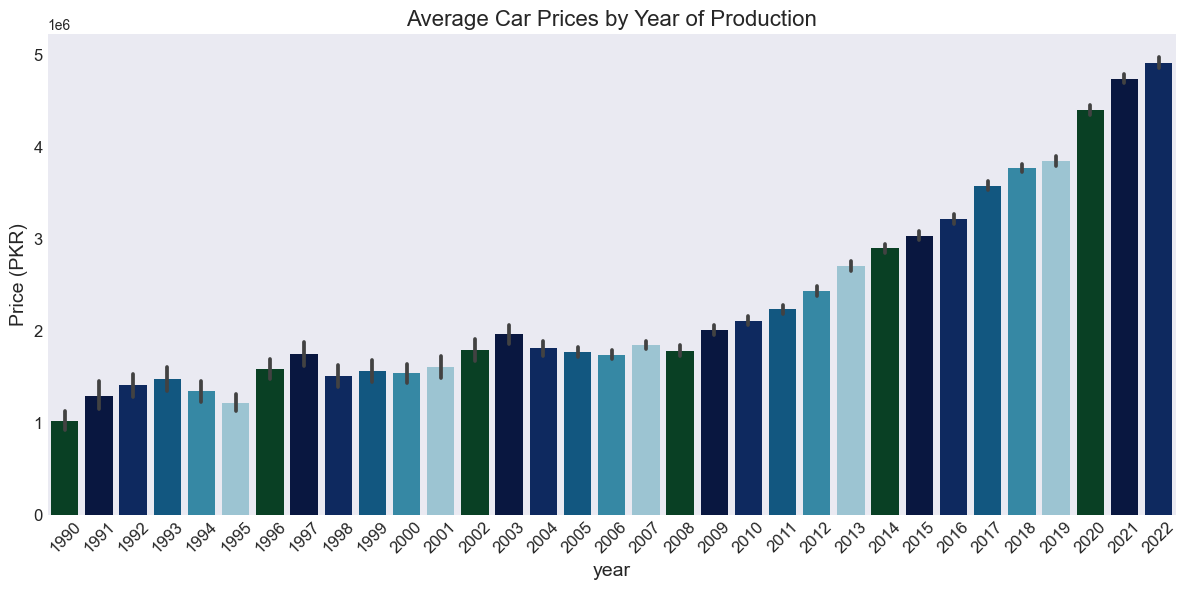

In [48]:
custom_colors = sns.color_palette("ocean")
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='price', data=df, palette=custom_colors)
plt.xlabel('year', fontsize=14)
plt.ylabel('Price (PKR)', fontsize=14)
plt.title('Average Car Prices by Year of Production', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# the Average  Price by Car Make

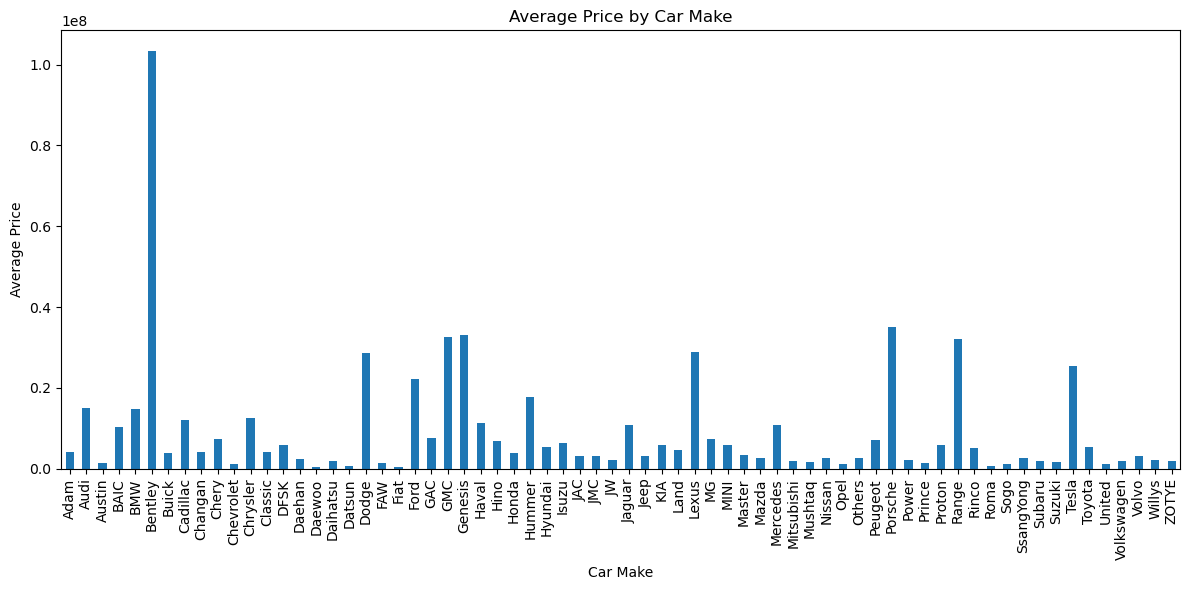

In [8]:
make_avg_price = df.groupby('make')['price'].mean()
plt.figure(figsize=(12, 6))
make_avg_price.plot(kind='bar')
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.title('Average Price by Car Make')
plt.xticks(rotation=90)
plt.tight_layout()

# what is Average Car Prices by Fuel Type ?

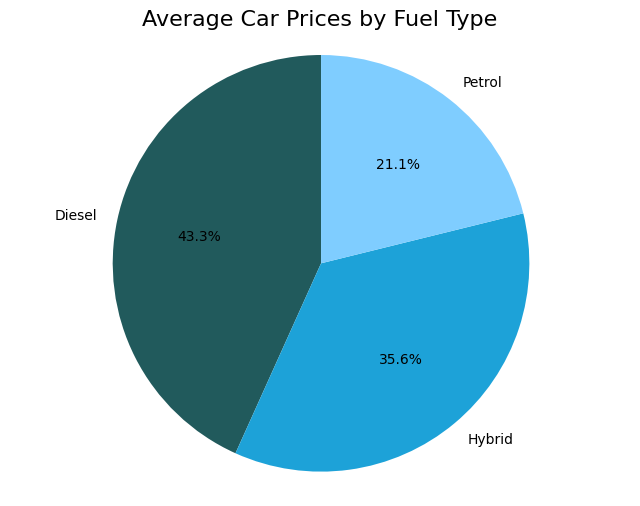

In [23]:
fuel_prices = df.groupby('fuel')['price'].mean().reset_index()
colors = ['#215a5c', '#1da2d8', '#7fcdff']
plt.figure(figsize=(8, 6))
plt.pie(fuel_prices['price'], labels=fuel_prices['fuel'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Average Car Prices by Fuel Type', fontsize=16)
plt.axis('equal')
plt.show()

# the most commonly used fuel


Text(0.5, 1.0, 'the most commonly used fuel')

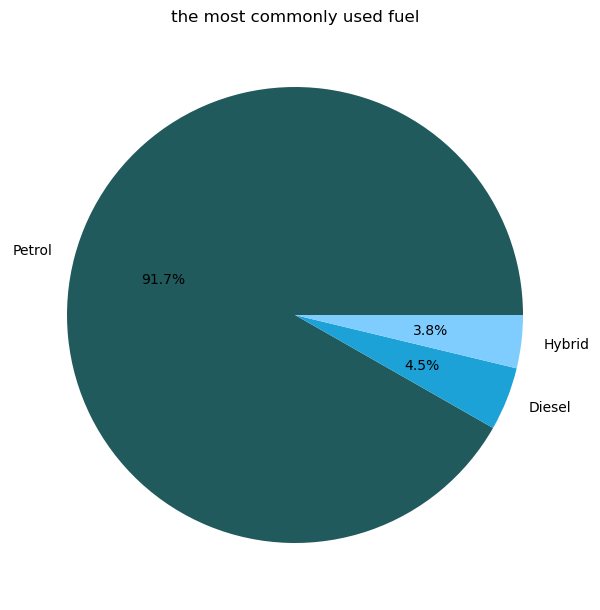

In [12]:
fuel_count = df['fuel'].value_counts().reset_index()
colors = ['#215a5c', '#1da2d8', '#7fcdff']
plt.figure(figsize=(12,6))
plt.pie(x='fuel', labels='index', autopct="%.1f%%", data=fuel_count,colors=colors)
plt.tight_layout()
plt.title('the most commonly used fuel')

# what is Average Car Prices by transmission Type ?

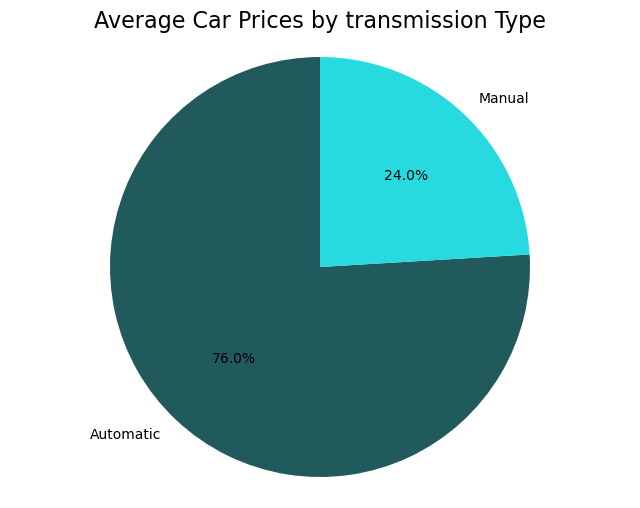

In [13]:

transmission_prices = df.groupby('transmission')['price'].mean().reset_index()
colors = ['#215a5c', '#26dae0']
plt.figure(figsize=(8, 6))
plt.pie(transmission_prices['price'], labels=transmission_prices['transmission'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Average Car Prices by transmission Type', fontsize=16)
plt.axis('equal')
plt.show()

#  the Most Common Car Models

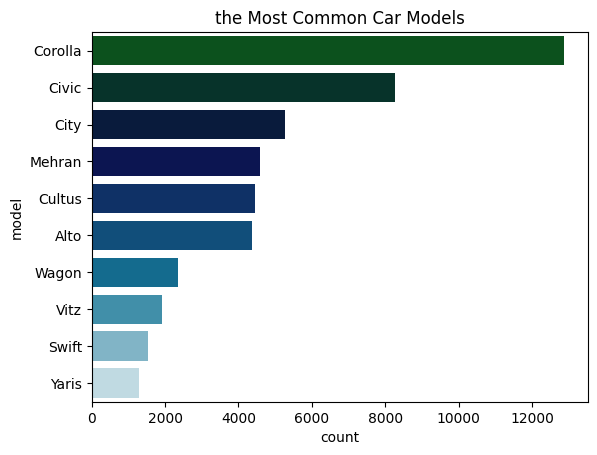

In [22]:
plt.title('the Most Common Car Models')
sns.countplot(data=df, y='model', order=df['model'].value_counts().nlargest(10).index, palette='ocean');

Are there more old cars for sale than new ones?

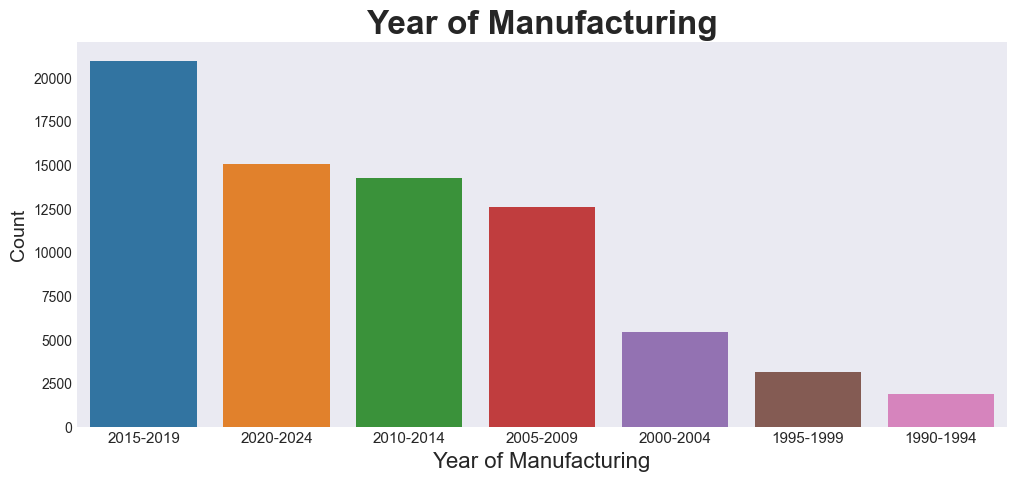

In [52]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['year_range'].value_counts().index, y = df['year_range'].value_counts().values)
plt.title('Year of Manufacturing', fontdict ={'fontweight':'bold','fontsize':24})
plt.xlabel('Year of Manufacturing', fontdict ={'fontsize':16})
plt.ylabel('Count', fontdict ={'fontsize':14})
plt.xticks(fontsize=11)
plt.show()

# the Most Common Body Types

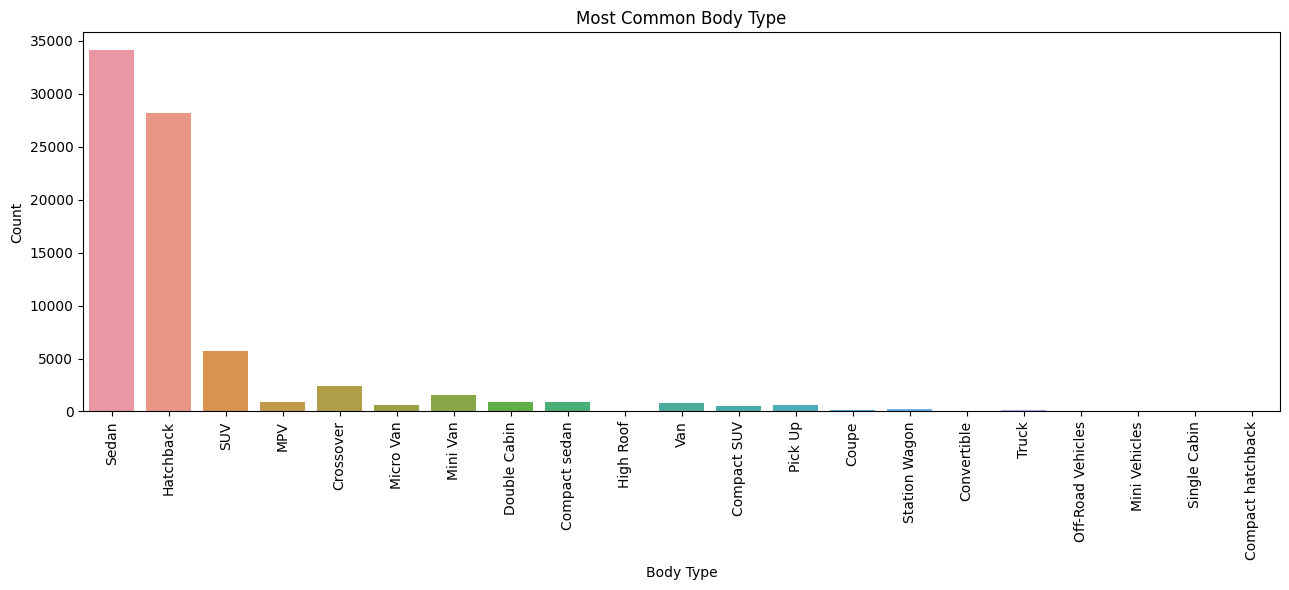

In [21]:
plt.figure(figsize=(13,6))
sns.countplot(df, x='body')
plt.xticks(rotation=90)
plt.title('Most Common Body Type')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.tight_layout()

# what is Average Engine Displacement by Car Make


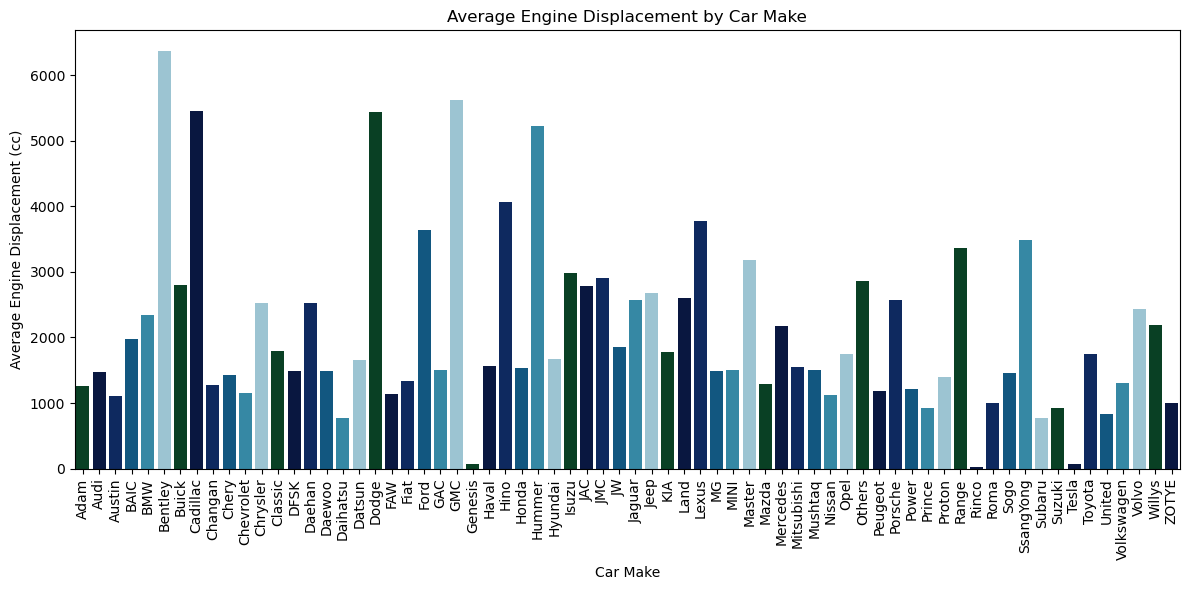

In [16]:
engine_make_avg = df.groupby(['make'])['engine'].mean().reset_index()
custom_colors = sns.color_palette("ocean")
plt.figure(figsize=(12,6))
sns.barplot(x='make', y='engine', data=engine_make_avg,palette=custom_colors)
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Average Engine Displacement (cc)')
plt.title('Average Engine Displacement by Car Make')
plt.tight_layout()

In [53]:
body_engine_avg = df.groupby(['body'])['engine'].mean().reset_index()

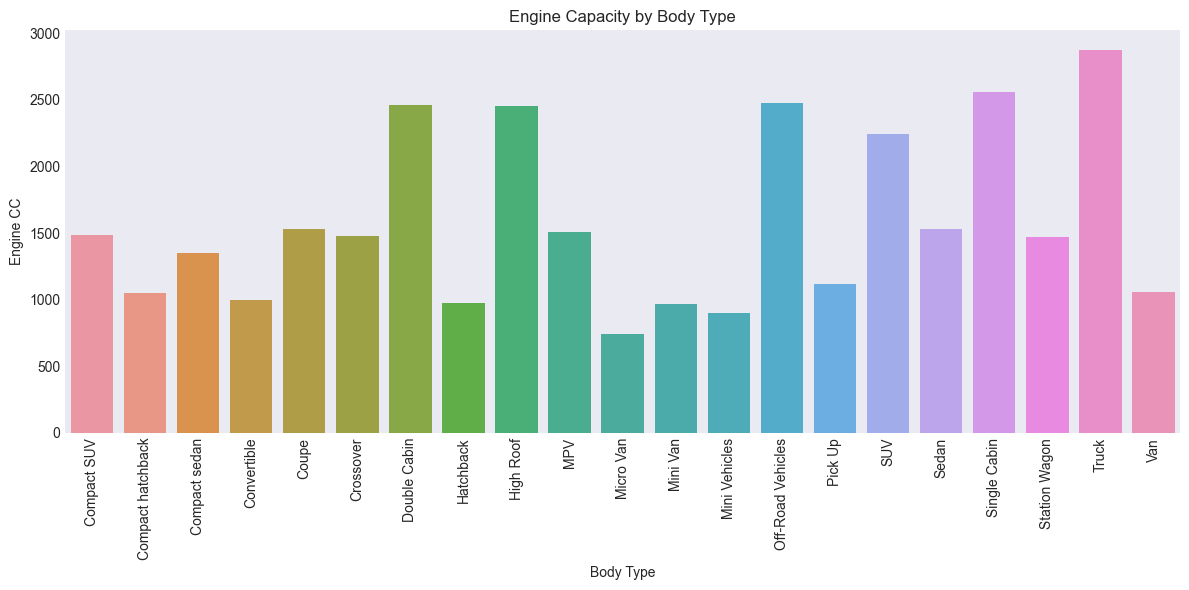

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x='body', y='engine', data=body_engine_avg)
plt.xticks(rotation=90)
plt.title('Engine Capacity by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Engine CC')
plt.tight_layout()

#  Average mileage of listed cars


In [24]:
average_mileage = df['mileage'].mean()
print(f"The average mileage of listed cars is {average_mileage:.2f} kms")

The average mileage of listed cars is 91109.19 kms


<AxesSubplot:>

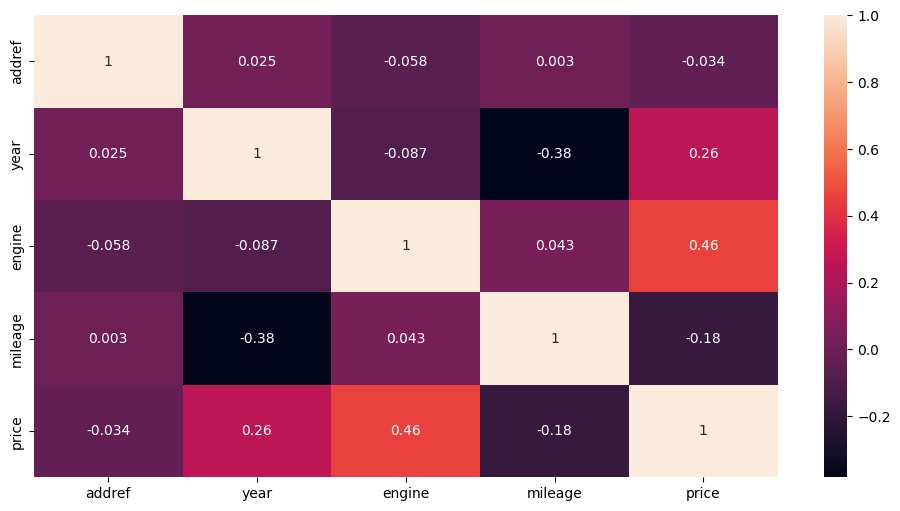

In [25]:
df_num = df.select_dtypes(include='number')
plt.figure(figsize =[12,6])
sns.heatmap(df_num.corr(),annot=True)

In [26]:
correlation = df['engine'].corr(df['price'])
print(f"There is a correlation between engine volume (engine) and car price with a correlation coefficient of {correlation:.2f}")


There is a correlation between engine volume (engine) and car price with a correlation coefficient of 0.46


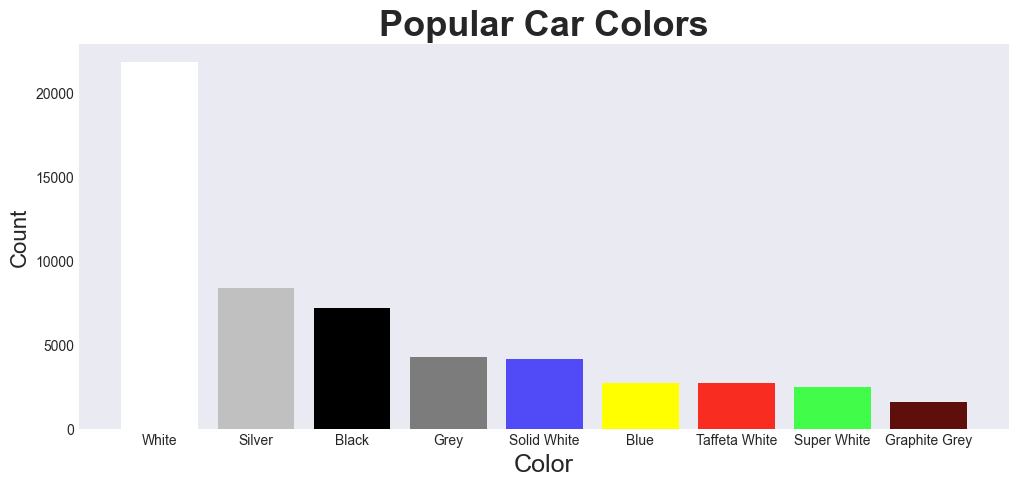

In [27]:
plt.figure(figsize=(12,5))
colors = ['White', '#C0C0C0', 'Black', '#7C7C7C', '#504AF7', 'yellow', '#F92C22', '#41FD49', '#5E0F0B']
plt.style.use('seaborn-dark')
plt.bar(x=df['color'].value_counts().head(9).index, height=df['color'].value_counts().head(9).values, color=colors)
plt.title('Popular Car Colors', fontdict ={'fontweight':'bold','fontsize':26})
plt.xlabel('Color', fontdict ={'fontsize':18})
plt.ylabel('Count', fontdict ={'fontsize':16})
plt.show()

In [29]:
assembly_prices = df.groupby(['assembly'])['price'].mean().reset_index()

Text(0, 0.5, 'Car Prices')

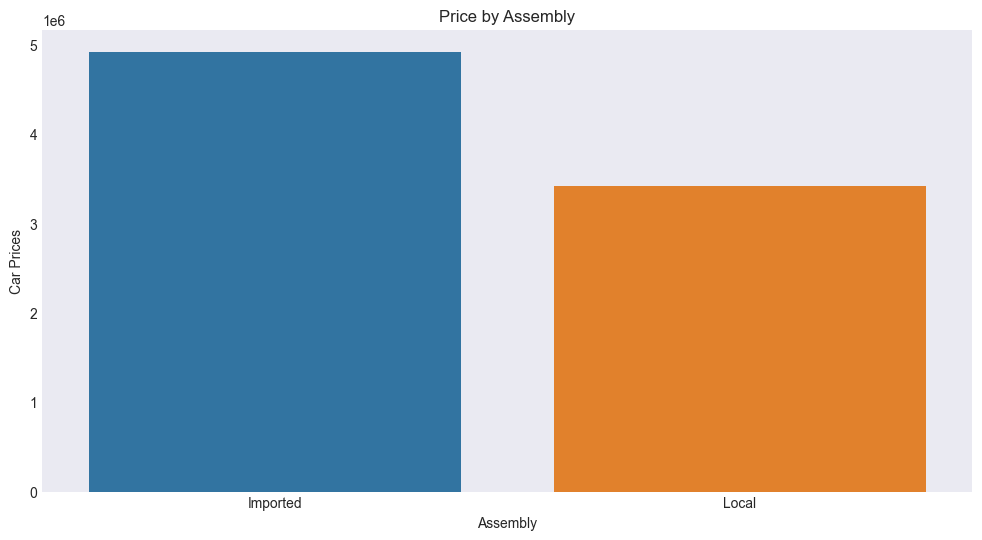

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x='assembly', y='price', data=assembly_prices)
plt.title('Price by Assembly')
plt.xlabel('Assembly')
plt.ylabel('Car Prices')

# Feature Extraction

In [17]:
def year_category(year):
    if year < 1995:
        return '1990-1994'
    elif year < 2000:
        return '1995-1999'
    elif year < 2005:
        return '2000-2004'
    elif year < 2010:
        return '2005-2009'
    elif year < 2015:
        return '2010-2014'
    elif year < 2020:
        return '2015-2019'
    else:
        return '2020-2024'

In [18]:
df['year_range'] = df['year'].apply(lambda x: year_category(x))
df.sample(3)

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price,year_range
14743,7640315,Rawalpindi,Local,Sedan,Honda,Civic,2012,1800,Automatic,Petrol,Silky Silver,Islamabad,107700,3200000,2010-2014
38586,7887615,Faisalabad,Local,SUV,BAIC,BJ40,2022,1981,Automatic,Petrol,Obsidian Black,Punjab,19000,10400000,2020-2024
41397,7881474,Lahore,Local,Hatchback,Suzuki,Swift,2011,1300,Manual,Petrol,Maroon,Punjab,155000,1700000,2010-2014


# 🚦Analysis Questions

1. Most common fuel type

In [20]:
most_common_fuel_type = df['fuel'].value_counts().idxmax()
print(f"The most common fuel type is {most_common_fuel_type}")

The most common fuel type is Petrol


2. Most common car body type

In [29]:
most_common_body_type = df['body'].value_counts().idxmax()
print(f"The most common car body type is {most_common_body_type}")

The most common car body type is Sedan


3. City with the highest number of car listings

In [31]:
most_common_city = df['city'].value_counts().idxmax()
print(f"The city with the most car listings is {most_common_city}")

The city with the most car listings is Lahore


4. Average mileage of listed cars

In [30]:
average_mileage = df['mileage'].mean()
print(f"The average mileage of listed cars is {average_mileage:.2f} kms")

The average mileage of listed cars is 91109.19 kms


5-what is The most expensive make and model?

In [22]:
make_model_avg_prices = df.groupby(['make', 'model'])['price'].mean().sort_values(ascending=False)
expensive_make_model = make_model_avg_prices.idxmax()
print(f"The most expensive make and model is {expensive_make_model}")

The most expensive make and model is ('Bentley', 'Mulsanne')


6- Which cities have the highest and lowest average car prices?

In [23]:
city_avg_prices = df.groupby('city')['price'].mean().sort_values(ascending=False)
highest_avg_price_city = city_avg_prices.idxmax()
lowest_avg_price_city = city_avg_prices.idxmin()
print(f"The city with the highest average car price is {highest_avg_price_city}")
print(f"The city with the lowest average car price is {lowest_avg_price_city}")

The city with the highest average car price is Gwadar
The city with the lowest average car price is Pishin


7. Count of imported vs. locally assembled cars

In [28]:
assembly_count = df['assembly'].value_counts()
print(f"Assembly types:\n{assembly_count}")

Assembly types:
Local       53689
Imported    24189
Name: assembly, dtype: int64


8. Is there a correlation between engine volume (engine_cc) and car price, and how strong is this correlation?

In [27]:
correlation = df['engine'].corr(df['price'])
print(f"There is a correlation between engine volume (engine) and car price with a correlation coefficient of {correlation:.2f}")

There is a correlation between engine volume (engine) and car price with a correlation coefficient of 0.46


9. How does the assembly type (imported or local) affect the car prices in different cities?


In [24]:
assembly_city_avg_prices = df.groupby(['assembly', 'city'])['price'].mean().unstack()
print("Average car prices by assembly type and city:")
print(assembly_city_avg_prices)

Average car prices by assembly type and city:
city        Abbottabad         Abdul       Adda         Ahmed         Akora  \
assembly                                                                      
Imported  2.895201e+06  2.575000e+06        NaN  2.243000e+06  2.873125e+06   
Local     2.370854e+06  2.112778e+06  2800000.0  2.270526e+06  1.582632e+06   

city            Ali     Alipur     Allahabad   Amangarh      Arifwala  ...  \
assembly                                                               ...   
Imported        NaN  3942500.0  1.075000e+06        NaN  2.711944e+06  ...   
Local     1030000.0  2519000.0  3.233333e+06  1370000.0  2.938571e+06  ...   

city         Ubauro      Ugoke       Umer        Vehari           Wah  \
assembly                                                                
Imported        NaN        NaN        NaN  2.924821e+06  2.615763e+06   
Local     2935000.0  1670000.0  5062500.0  2.715806e+06  2.400690e+06   

city           Wahn     Wazirab

10- what are the top color?

In [3]:
top_colors = df['color'].value_counts().head(5)
print("The most popular car colors in the dataset are:")
for color, count in top_colors.items():
    print(f"- {color}: {count} vehicles")

The most popular car colors in the dataset are:
- White: 21444 vehicles
- Silver: 8173 vehicles
- Black: 7014 vehicles
- Grey: 4173 vehicles
- Solid White: 4073 vehicles


# Handel Outliers

<AxesSubplot:>

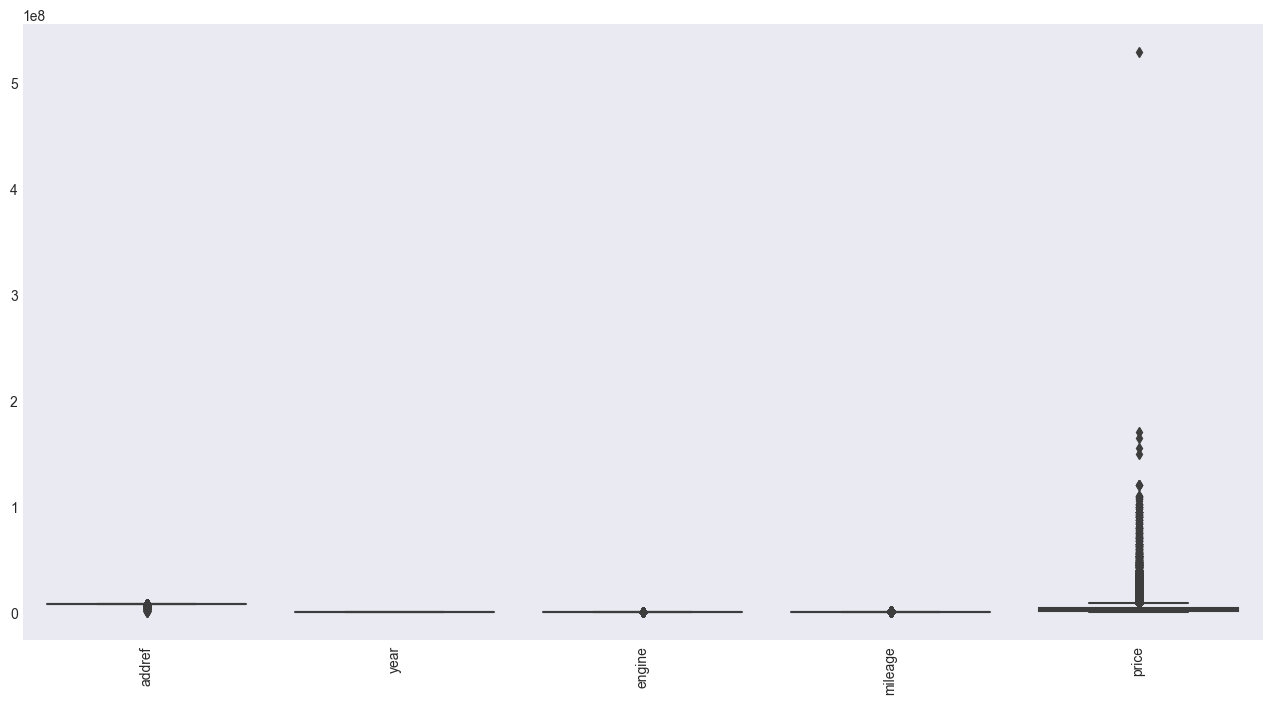

In [31]:
plt.figure(figsize=[16,8])
plt.xticks(rotation = 90)
sns.boxplot(data = df)

In [32]:
! pip install datasist

  Using cached datasist-1.5.3-py3-none-any.whl (33 kB)
     -------------------------------------- 302.2/302.2 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 7.1/7.1 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 121.9/121.9 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 139.4/139.4 kB 2.1 MB/s eta 0:00:00
     -------------------------------------- 269.9/269.9 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 78.3/78.3 kB 485.8 kB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 214.9/214.9 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 89.9/89.9 kB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 93.5/93.5 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: jupyter-core
    Found existing installation: j

In [33]:
from datasist.structdata import detect_outliers
index = detect_outliers(df , 0 , ['price'])
len(index)

4313

In [34]:
df.shape

(77878, 15)

In [35]:
df.drop(index,inplace=True)

# Split data into input and output

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73565 entries, 0 to 77877
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   addref        73565 non-null  int64 
 1   city          73565 non-null  object
 2   assembly      73565 non-null  object
 3   body          73565 non-null  object
 4   make          73565 non-null  object
 5   model         73565 non-null  object
 6   year          73565 non-null  int16 
 7   engine        73565 non-null  int16 
 8   transmission  73565 non-null  object
 9   fuel          73565 non-null  object
 10  color         73565 non-null  object
 11  registered    73565 non-null  object
 12  mileage       73565 non-null  int64 
 13  price         73565 non-null  int64 
 14  year_range    73565 non-null  object
dtypes: int16(2), int64(3), object(10)
memory usage: 8.1+ MB


In [37]:
X = df.drop('price' , axis = 1)
y = df['price'] 

# dealing with categorical data

In [41]:
X = pd.get_dummies(X , drop_first = True)
X

,addref,year,engine,mileage,city_Abdul,city_Adda,city_Ahmed,city_Akora,city_Ali,city_Alipur,...,registered_Vehari,registered_Wah cantt,registered_Wazirabad,registered_Zafarwal,year_range_1995-1999,year_range_2000-2004,year_range_2005-2009,year_range_2010-2014,year_range_2015-2019,year_range_2020-2024
0,7943732,2013,1300,145000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,7730314,2000,1300,230000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,7943737,2021,1300,60500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7943733,2017,1300,87000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,7923484,2017,1800,86000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77873,7775164,2019,1800,58000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
77874,7772775,2015,660,65000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
77875,7773716,2021,1490,5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
77876,7322377,2005,1300,19000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Split data into train and test

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# feature scaling

In [43]:
x_train

,addref,year,engine,mileage,city_Abdul,city_Adda,city_Ahmed,city_Akora,city_Ali,city_Alipur,...,registered_Vehari,registered_Wah cantt,registered_Wazirabad,registered_Zafarwal,year_range_1995-1999,year_range_2000-2004,year_range_2005-2009,year_range_2010-2014,year_range_2015-2019,year_range_2020-2024
4019,7940622,2002,2000,123000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
56461,7845597,2017,1300,199456,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25389,7913893,2006,1000,120000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2635,7941896,2014,1300,105700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15231,7728432,2003,1500,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39812,7884928,2017,1000,84000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6784,7751697,2017,1300,103000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
58374,7302597,2018,1300,80000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
932,7870453,2015,1300,64262,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [45]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = sc.get_feature_names_out())
x_train_scaled

,addref,year,engine,mileage,city_Abdul,city_Adda,city_Ahmed,city_Akora,city_Ali,city_Alipur,...,registered_Vehari,registered_Wah cantt,registered_Wazirabad,registered_Zafarwal,year_range_1995-1999,year_range_2000-2004,year_range_2005-2009,year_range_2010-2014,year_range_2015-2019,year_range_2020-2024
0,0.490355,-1.404703,1.109093,0.322980,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,3.536150,-0.456194,-0.493503,-0.631801,-0.505373
1,0.130758,0.586056,-0.056404,1.169671,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,-0.282793,-0.456194,-0.493503,1.582777,-0.505373
2,0.389206,-0.873834,-0.555903,0.289757,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,-0.282793,2.192051,-0.493503,-0.631801,-0.505373
3,0.495176,0.187904,-0.056404,0.131395,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,-0.282793,-0.456194,2.026332,-0.631801,-0.505373
4,-0.312623,-1.271986,0.276595,-1.039140,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,3.536150,-0.456194,-0.493503,-0.631801,-0.505373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58847,0.279596,0.586056,-0.555903,-0.108915,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,-0.282793,-0.456194,-0.493503,1.582777,-0.505373
58848,-0.224583,0.586056,-0.056404,0.101495,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,-0.282793,-0.456194,-0.493503,1.582777,-0.505373
58849,-1.924087,0.718773,-0.056404,-0.153212,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,-0.282793,-0.456194,-0.493503,1.582777,-0.505373
58850,0.224819,0.320621,-0.056404,-0.327499,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,-0.282793,-0.456194,-0.493503,1.582777,-0.505373


In [46]:
x_test_scaled = pd.DataFrame(x_test_scaled , columns = sc.get_feature_names_out())
x_test_scaled

,addref,year,engine,mileage,city_Abdul,city_Adda,city_Ahmed,city_Akora,city_Ali,city_Alipur,...,registered_Vehari,registered_Wah cantt,registered_Wazirabad,registered_Zafarwal,year_range_1995-1999,year_range_2000-2004,year_range_2005-2009,year_range_2010-2014,year_range_2015-2019,year_range_2020-2024
0,0.153800,1.249642,1.109093,-0.861963,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,-0.282793,-0.456194,-0.493503,-0.631801,1.978735
1,0.059538,-0.741117,-0.222904,-0.518662,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,-0.282793,2.192051,-0.493503,-0.631801,-0.505373
2,-0.086617,1.249642,1.109093,-0.884112,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,-0.282793,-0.456194,-0.493503,-0.631801,1.978735
3,0.183290,0.984208,-1.122002,-0.263955,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,-0.282793,-0.456194,-0.493503,-0.631801,1.978735
4,0.089358,-1.537420,-0.056404,0.068272,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,3.536150,-0.456194,-0.493503,-0.631801,-0.505373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14708,0.262094,-1.404703,0.276595,-0.902440,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,3.536150,-0.456194,-0.493503,-0.631801,-0.505373
14709,0.408657,-0.210248,0.776094,0.621984,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,-0.282793,-0.456194,2.026332,-0.631801,-0.505373
14710,0.123912,-2.731876,-0.888903,2.283119,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,-0.282793,-0.456194,-0.493503,-0.631801,-0.505373
14711,-0.072842,-0.475682,0.776094,0.854543,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.016491,-0.00583,-0.004122,-0.004122,-0.212643,-0.282793,2.192051,-0.493503,-0.631801,-0.505373
